# Gender Gap Analysis in Data Science and Machine Learning

## Environment Setup

In [1]:
### Import Libraries
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
sns.set_theme(style="whitegrid")

## Data Import

In [2]:
# Load Raw Data
df_raw = pd.read_csv("data/raw/kaggle_survey_2022_responses.csv", low_memory=False)

### Data inspect
The dataset is inspected using basic methods such as .info(), .shape, and .head() to understand the structure, size, and preview the content. This step helps identify any initial anomalies and informs the following cleaning steps.

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23998 entries, 0 to 23997
Columns: 296 entries, Duration (in seconds) to Q44_12
dtypes: object(296)
memory usage: 54.2+ MB


In [4]:
df_raw.shape

(23998, 296)

In [5]:
df_raw.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


### Export survey questions and choices
Survey questions and choices embedded in the dataset’s first rows are extracted and saved as a separate CSV file for documentation purposes. These are removed from the working dataset to avoid interference with analysis.

In [6]:
# Extract and save the survey questions and choices for reference
survey_questions = df_raw.iloc[0]
survey_full_text = "data/supplementary/survey_questions_full_text.csv"
survey_questions.to_csv(survey_full_text, index=True)

## Data Cleaning and Preprocessing
Steps include removing duplicate rows, standardizing column names, handling missing critical values, and normalizing categorical gender responses. A clean dataset including all gender responses is created (`df_clean`). A focused subset containing only Man, Woman, and Nonbinary categories is derived (`df_gender`) for subsequent analysis.
Obs: Missing values (NaN) are expected in multiple choice questions (all Qn_x)

A summary comparison of original, cleaned, and filtered dataset shapes is included to track data reduction and cleaning effects.

### Clean survey data

In [7]:
# Make a copy of the raw data without first row
df_clean = df_raw[1:].copy()

# Drop first column with survey response duration
df_clean.drop(columns=["Duration (in seconds)"], inplace=True)

# Drop duplicates
df_clean.drop_duplicates(inplace=True)

# Rename columns to lowercase and replace spaces with underscores for consistency
df_clean.columns = df_clean.columns.str.lower().str.replace(' ', '_')

# Remove rows with missing gender or salary information
df_clean = df_clean.dropna(subset=['q3'])

# Map gender responses to consistent categories
gender_map = {
    'man': 'Man',
    'woman': 'Woman',
    'non-binary': 'Nonbinary',
    'nonbinary': 'Nonbinary',
}

# Normalize the gender column, which is 'q3' in this survey
df_clean['q3'] = df_clean['q3'].str.lower().map(gender_map)

# Create the main subset with only Man, Woman, Nonbinary for focused analysis
df_gender = df_clean[df_clean['q3'].isin(['Man', 'Woman', 'Nonbinary'])].copy()

# Show data summary
print(f'Raw data shape: {df_raw.shape}')
print(f'Clean data shape: {df_clean.shape}')
print(f'Gender-focused data shape: {df_gender.shape}')

Raw data shape: (23998, 296)
Clean data shape: (23934, 295)
Gender-focused data shape: (23567, 295)


### Export clean datasets

In [8]:
# Export Clean dataset
df_clean_export = "data/processed/responses_clean.csv"
df_clean.to_csv(df_clean_export, index=True)

# Export Clean and filtered Gender dataset
df_gender_export = "data/processed/responses_clean_gender.csv"
df_gender.to_csv(df_gender_export, index=True)

## Exploratory Data Analysis (EDA)

This section presents univariate and bivariate analyses of the cleaned dataset, supported by insights from SQL queries. It covers demographic distributions, educational levels, age ranges, salary disparities, and job role representation among genders. Visualizations and statistical tests are used to reveal patterns and answer key business questions.

**Key business questions:**
- What is the gender distribution among respondents?  
- Which countries have the highest representation of data science professionals?  
- Is there a difference in the level of education among different genders?  
- How does age distribution vary by gender?  
- What is the gender pay gap in data science and machine learning professions?  
- How are job titles distributed across genders?  

### Univariate Analysis
Univariate questions are addressed by examining single variables, primarily through SQL queries. These results are visualized and discussed to summarize the dataset's demographic composition. 
All SQL queries in this section were executed on the processed survey database located at `data/processed/responses_clean_gender.db`  
The complete list of SQL queries is documented in the file [`SQL/GGA_queries.sql`](..SQL/GGA_queries.sql)

In [9]:
#read the sql queries responses to create visualizations:
country_per = pd.read_csv("data/outputs/sql_outputs/country-total.csv")
edu_per = pd.read_csv("data/outputs/sql_outputs/education-gender.csv")
gender_per = pd.read_csv("data/outputs/sql_outputs/gender.csv")

#### 1. Top 15 countries
Which countries have the highest representation?

SQL query results are used to identify and rank respondent origins. The analysis highlights regional patterns and the concentration of professionals in certain countries.

In [10]:
country_per #SQL query return

,Country,Total respondents,Percentage
0,India,8617,36.56
1,United States of America,2853,12.11
2,Other,1407,5.97
3,Brazil,826,3.50
4,Nigeria,724,3.07
5,Pakistan,615,2.61
6,Japan,550,2.33
7,China,437,1.85
8,Egypt,382,1.62
9,Mexico,378,1.60


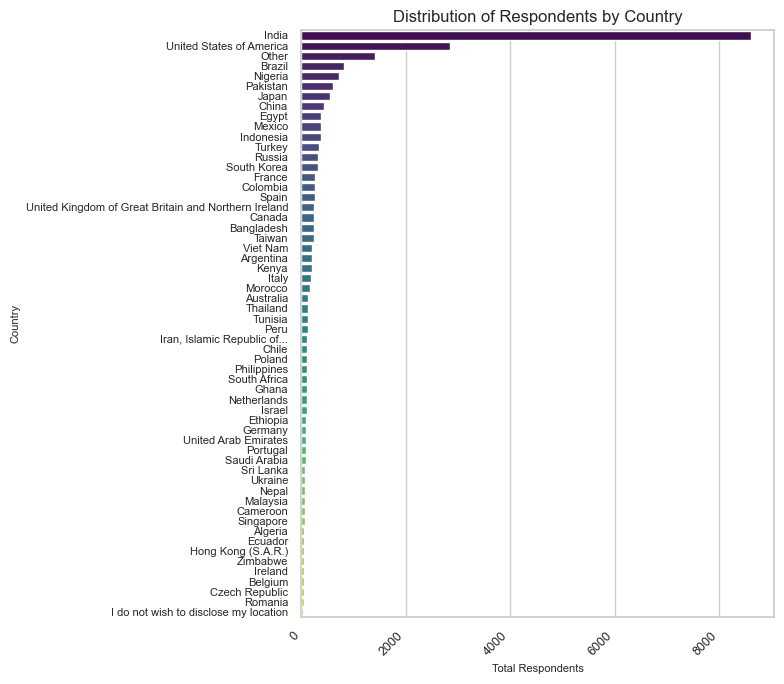

In [11]:
# Country distribution
plt.figure(figsize=(8, 7))
ax = sns.barplot(
    x='Total respondents',
    y='Country',
    data=country_per,
    hue='Country',
    palette='viridis'
)

plt.title('Distribution of Respondents by Country', fontsize=12)
plt.xlabel('Total Respondents', fontsize=8)
plt.ylabel('Country', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

**Analysis**
- Geographic Coverage: The survey collected responses from 56 distinct countries/territories, excluding the aggregated "Other" category and any undisclosed locations.
- Respondent Concentration: The participant base is heavily concentrated, with India (8,792 respondents, 36.64%) and the United States of America (2,920 respondents, 12.17%) together accounting for 48.81% of all survey responses.
- Data Aggregation: Consistent with the survey's methodology, countries with fewer than 50 respondents were grouped into an "Other" category (1,430 respondents, 5.96%) for de-identification purposes.
- European Representation: European Union countries show limited participation. France, with 262 respondents (1.09%), is the highest-ranking EU nation among the top 15, placed 15th overall.
- Methodological Bias: The survey's distribution likely introduces a sampling bias. This approach tends to overrepresent regions with high Kaggle community engagement, suggesting that these results may not be generalizable to broader global populations or market distributions, particularly for underrepresented regions like the EU.

#### 2. What is the gender distribution among respondents?
SQL query aggregates gender responses, plotted for comparison. The distribution reveals levels of male, female, and nonbinary representation.

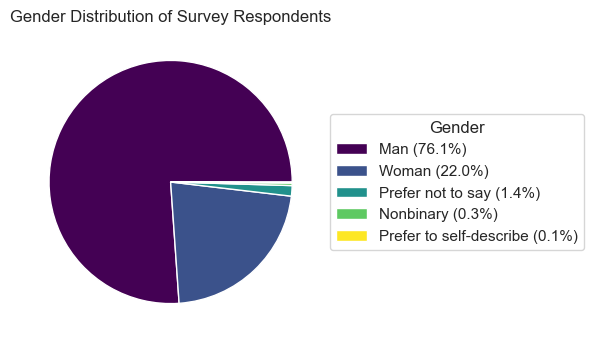

In [12]:
#Gender distribution
labels = gender_per['Gender']
sizes = gender_per['Percentage']

# Generate colors from the 'viridis' colormap
cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, len(sizes))]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=None, colors=colors)
legend_labels = [f'{l} ({s:.1f}%)' for l, s in zip(labels, sizes)]
plt.legend(legend_labels,
           title="Gender",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Gender Distribution of Survey Respondents', fontsize=12)
plt.tight_layout()
plt.show()

**Analysis** 
- The gender distribution: Man around 76%, Woman around 22%, Nonbinary and Self-describe around 0.5%
- Although highly disporportional, this gender representation is in line with global industry trends, that shows a range of 22%-26% for women in AI/ML/Data Science roles globally. Thus, we can consider the analysis as a reflection of the global situation regarding the gender distribution. 
- Important reminder: the same is not valid for region distribution.
- (sources: https://www.weforum.org/publications/gender-parity-in-the-intelligent-age-2025/, https://www.pwc.com/gx/en/about/inclusion/gender-equity/ai-accelerating-womens-inclusion-workplace.html, https://www2.deloitte.com/content/dam/Deloitte/us/Documents/consulting/us-ai-institute-women-in-data-careers.pdf)
- Since we can't know the gender of those who "Prefer not to say" and those who "Self-describe", I removed them from the further analyis.

### Bivariate Analysis
Bivariate analysis explores relationships between two variables, incorporating SQL results and visualizations to understand how gender intersects with education, age, salary, and job roles.

#### 3. Educational level by Gender
Is there a difference in the level of education among different genders?

In [13]:
edu_per #SQL query return

,Gender,Education Level,Total Respondents,% by Gender
0,Man,Master’s degree,6968,39.12
1,Man,Bachelor’s degree,5889,33.06
2,Man,Doctoral degree,1993,11.19
3,Man,Some college/university study without earning ...,1109,6.23
4,Man,I prefer not to answer,964,5.41
5,Man,No formal education past high school,472,2.65
6,Man,Professional doctorate,419,2.35
7,Nonbinary,Master’s degree,28,36.36
8,Nonbinary,Bachelor’s degree,25,32.47
9,Nonbinary,Some college/university study without earning ...,12,15.58


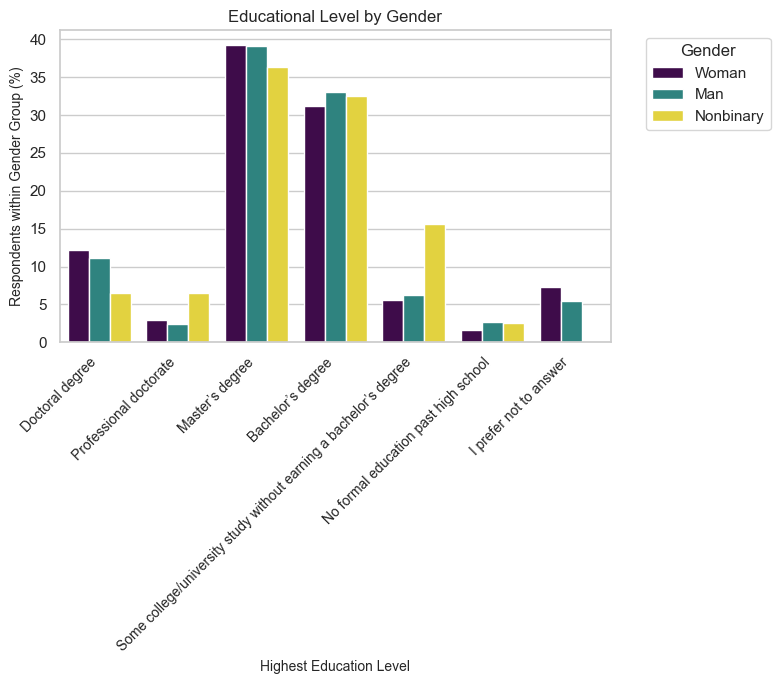

In [14]:
#Education level by gender
education_order = [
    'Doctoral degree',
    'Professional doctorate',
    'Master’s degree',
    'Bachelor’s degree',
    'Some college/university study without earning a bachelor’s degree',
    'No formal education past high school',
    'I prefer not to answer']

edu_per['Education Level'] = pd.Categorical(
    edu_per['Education Level'],
    categories=education_order,
    ordered=True)

gender_order = [ 'Woman', 'Man', 'Nonbinary']

viridis = plt.get_cmap('viridis')
palette = [viridis(i) for i in np.linspace(0, 1, 3)]
plt.figure(figsize=(8, 7))
ax = sns.barplot(
    x='Education Level',
    y='% by Gender',
    hue='Gender',
    hue_order=gender_order,
    data=edu_per,
    palette=palette
)

plt.title('Educational Level by Gender', fontsize=12)
plt.xlabel('Highest Education Level', fontsize=10)
plt.ylabel('Respondents within Gender Group (%)', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
       
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()        

**Analysis**
- Consistent Foundational Degrees: The most common educational levels across all gender groups are Master's and Bachelor's degrees, showing consistency in proportions:
    - Master's Degree: Men (39.1%), Women (39.22%), Nonbinary (36.36%)
    - Bachelor's Degree: Men (33.08%), Women (31.25%), Nonbinary (32.47%)

#### 4. Age range distribution by Gender
This subsection analyzes the age distribution among different gender groups to understand demographic patterns. The analysis uses categorical ordering to maintain logical age group progression and visualizes the counts and proportions by gender.

In [15]:
# Define the order of age ranges and genders
age_order = [
    '18-21', '22-24', '25-29', '30-34', '35-39',
    '40-44', '45-49', '50-54', '55-59', '60-69', '70+'
]

gender_order = ['Woman', 'Man', 'Nonbinary']

In [16]:
# Convert the age column to a categorical type with ordering
df_gender['age_range'] = pd.Categorical(
    df_gender['q2'],  # assuming 'q2' is age field in your df_gender
    categories=age_order,
    ordered=True
)

Visualize counts of age groups by gender

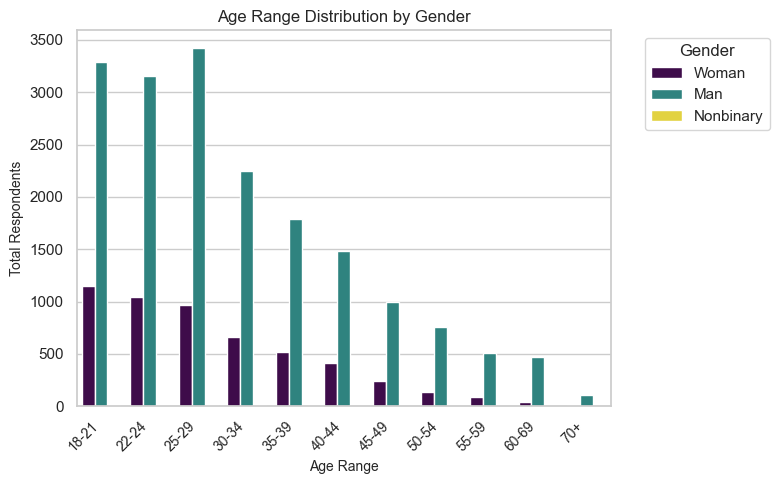

In [17]:
# Visualize counts of age groups by gender
viridis = plt.get_cmap('viridis')
palette = [viridis(i) for i in np.linspace(0, 1, 3)]
plt.figure(figsize=(8, 5))

ax = sns.countplot(
    x='age_range',
    hue='q3',
    data=df_gender,
    hue_order=gender_order,
    order=age_order,
    palette=palette
)

plt.title('Age Range Distribution by Gender', fontsize=12)
plt.xlabel('Age Range', fontsize=10)
plt.ylabel('Total Respondents', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Visualize proportion of gender within age groups

/var/folders/_5/9xl167095gn7qzk16djnlv300000gp/T/ipykernel_21293/543720710.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_props = df_gender.groupby(['age_range', 'q3']).size().unstack(fill_value=0)


<Figure size 1400x800 with 0 Axes>

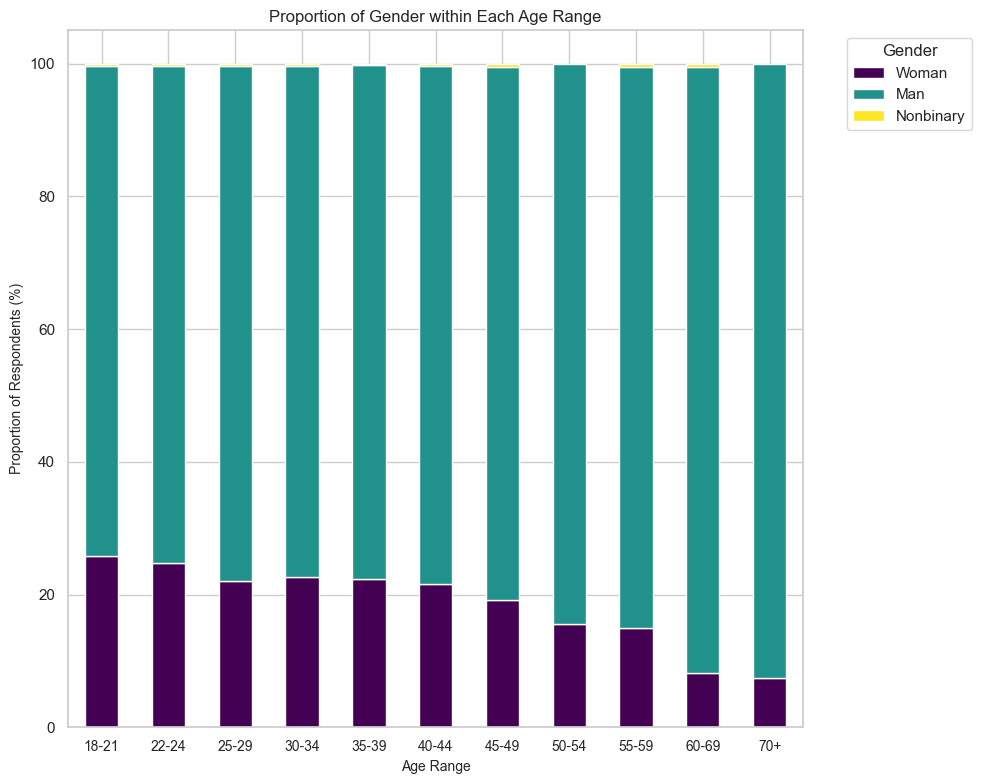

In [18]:
# Visualize proportion of gender within age groups

# Calculate percentage per age group stacked bar
gender_age_props = df_gender.groupby(['age_range', 'q3']).size().unstack(fill_value=0)

# Normalize rows to percentages
gender_age_props = gender_age_props.divide(gender_age_props.sum(axis=1), axis=0) * 100

gender_age_props = gender_age_props.loc[age_order, gender_order]  # reorder rows and columns

plt.figure(figsize=(14, 8))
ax = gender_age_props.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 8))

plt.title('Proportion of Gender within Each Age Range', fontsize=12)
plt.xlabel('Age Range', fontsize=10)
plt.ylabel('Proportion of Respondents (%)', fontsize=10)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Filter the DataFrame for 'Nonbinary' respondents only

/var/folders/_5/9xl167095gn7qzk16djnlv300000gp/T/ipykernel_21293/3652822861.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


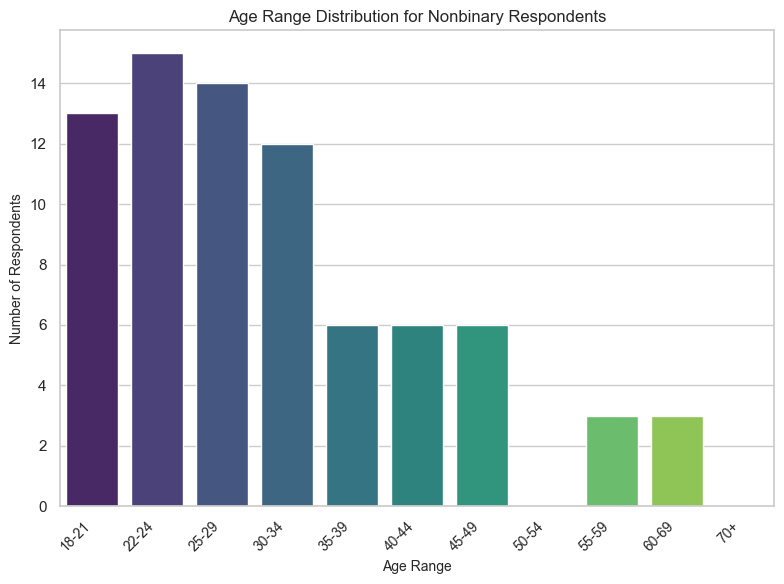

In [19]:
# Filter the DataFrame for 'Nonbinary' respondents only
df_gender_nonbinary = df_gender[df_gender['q3'] == 'Nonbinary'].copy()

# Correctly set the categorical order for the age range column 'q2'
df_gender_nonbinary.loc[:, 'q2'] = pd.Categorical(
    df_gender_nonbinary['q2'],
    categories=age_order,
    ordered=True
)

# Create the plot for Nonbinary respondents
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df_gender_nonbinary,
    x='q2',
    order=age_order,
    palette='viridis'
)

plt.title('Age Range Distribution for Nonbinary Respondents', fontsize=12)
plt.xlabel('Age Range', fontsize=10)
plt.ylabel('Number of Respondents', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

**Analysis**
- The survey population, although biased, confirms the field of data science as strongly male-dominated across all age groups.
- Women's participation is stable but does not increase with age; representation might thin slightly in older brackets.
- Nonbinary representation, while very low overall, is more visible among younger respondents—suggesting generational differences in gender diversity or reporting comfort.
- The 18–29 segment is the main entry point for new participants, indicating where outreach or retention efforts may have the most impact for increasing diversity.
- These findings could inform strategies aimed at increasing both gender diversity and overall field inclusivity, especially for groups currently underrepresented in older cohorts.

#### 5. Students vs Professionals by Gender
This analysis explores the composition of respondents by gender who identify as students or professionals. It provides insight into the relative proportions of each category within gender groups, highlighting demographic participation in education versus professional roles.

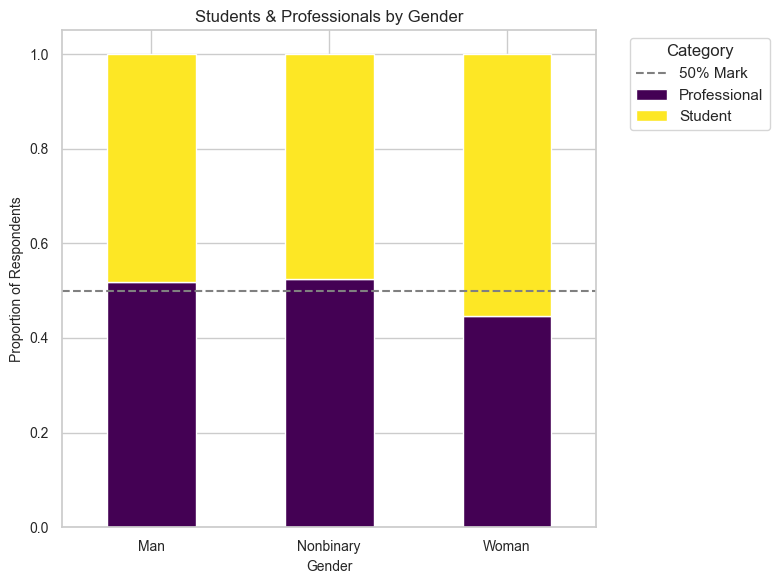

In [20]:
# Label respondents as Student or Professional based on Q5
df_gender['Q5_label'] = df_gender['q5'].map({
    'Yes': 'Student', 'No': 'Professional'})

# Calculate proportions within each gender group
student_prop = df_gender.groupby('q3')['Q5_label'].value_counts(
    normalize=True).unstack(fill_value=0)

plt.figure(figsize=(8, 6))

ax = student_prop.plot(
    kind='bar',
    stacked=True,
    ax=plt.gca(),
    cmap='viridis'
)

plt.title('Students & Professionals by Gender', fontsize=12)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Proportion of Respondents', fontsize=10)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)

# Add horizontal 50% mark line
plt.axhline(y=0.5, color='grey', linestyle='--', label='50% Mark')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Analysis**
- All gender groups are composed of both students and professionals at nearly a 50–50 split. The 50% reference line helps to clearly see that, in each group, the division is quite balanced.
- Women respondents are the only group slightly more students. It could indicate a trend of increasing number of women studing data science, or stronger interest in communities for practice and support than men and nonbiniary people. It requires further investigation to draw conclusions about that.

#### 6. Gender pay gap
Is there a pay gap among gender? 
This question was asked only to respondents who are not students (Q5 = "No") and are not unemployed (Q23 != "unemployed")
This section analyzes salary differences across genders using filtered survey data of only employed professionals (students and unemployed filtered out). The salary range data is processed by converting ranges to numeric midpoints to enable quantitative analysis. This section includes visualization of salary distributions, mean and median salary comparisons, and statistical tests such as chi-square for independence between gender and salary categories.

Filter dataset to employed professionals with valid salaries

In [21]:
# Subset: only employed professionals (Q5=No, Q23=not unemployed), drop missing salary rows
df_filtered = df_gender[(df_gender['q5'] == 'No') & (df_gender['q23'] != 'unemployed')].copy()
df_filtered.dropna(subset=['q29'], inplace=True)

Convert salary ranges to numeric midpoints. Midpoint = the average of each range. Ex: first range 0-999, midpoint is (0+999)/2=499.5

In [22]:
def salary_range_to_midpoint(salary_range):
    if pd.isna(salary_range):
        return np.nan
    salary_range = salary_range.replace(',', '').strip()
    if '-' in salary_range:
        parts = salary_range.split('-')
        try:
            low = float(parts[0])
            high = float(parts[1])
            return (low + high) / 2
        except:
            return np.nan
    else:  # Single value or other format
        try:
            return float(salary_range)
        except:
            return np.nan

df_filtered['salary_midpoint'] = df_filtered['q29'].apply(salary_range_to_midpoint)

#### Overall Salary Range Distribution

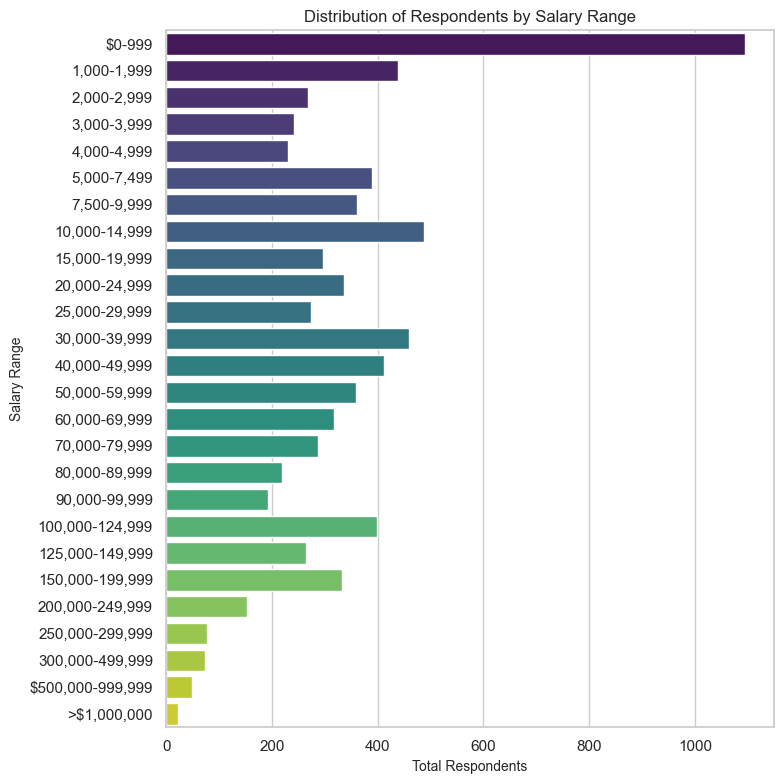

In [23]:
salary_order = [
    '$0-999',
    '1,000-1,999',
    '2,000-2,999',
    '3,000-3,999',
    '4,000-4,999',
    '5,000-7,499',
    '7,500-9,999',
    '10,000-14,999',
    '15,000-19,999',
    '20,000-24,999',
    '25,000-29,999',
    '30,000-39,999',
    '40,000-49,999',
    '50,000-59,999',
    '60,000-69,999',
    '70,000-79,999',
    '80,000-89,999',
    '90,000-99,999',
    '100,000-124,999',
    '125,000-149,999',
    '150,000-199,999',
    '200,000-249,999',
    '250,000-299,999',
    '300,000-499,999',
    '$500,000-999,999',
    '>$1,000,000'
]

df_filtered['q29'] = pd.Categorical(df_filtered['q29'], categories=salary_order, ordered=True)

plt.figure(figsize=(8, 8))
sns.countplot(
    y='q29',
    data=df_filtered,
    hue='q29',
    palette='viridis',
    order=salary_order
)
plt.title('Distribution of Respondents by Salary Range', fontsize=12)
plt.xlabel('Total Respondents', fontsize=10)
plt.ylabel('Salary Range', fontsize=10)
plt.tight_layout()
plt.show()

#### Salary Midpoint Distribution by Gender

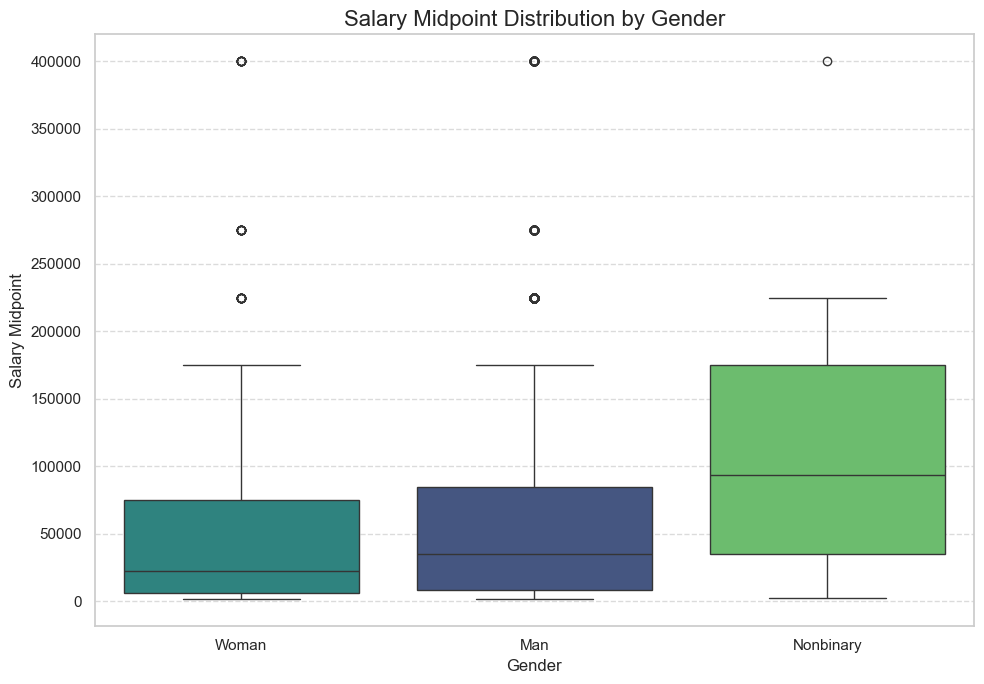

In [24]:
plt.figure(figsize=(10, 7))
sns.boxplot(
    x='q3',
    y='salary_midpoint',
    data=df_filtered,
    order=['Woman', 'Man', 'Nonbinary'],
    hue='q3',
    palette='viridis'
)
plt.title('Salary Midpoint Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Salary Midpoint', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Summary statistics of salary midpoints by gender

In [25]:
median_salary = df_filtered.groupby('q3')['salary_midpoint'].median().sort_values(ascending=False)
mean_salary = df_filtered.groupby('q3')['salary_midpoint'].mean().sort_values(ascending=False)

print("\nMedian Salary Midpoint by Gender:")
print(median_salary)

print("\nMean Salary Midpoint by Gender:")
print(round(mean_salary))


Median Salary Midpoint by Gender:
q3
Nonbinary    93749.5
Man          34999.5
Woman        22499.5
Name: salary_midpoint, dtype: float64

Mean Salary Midpoint by Gender:
q3
Nonbinary    112000.0
Man           58390.0
Woman         49813.0
Name: salary_midpoint, dtype: float64


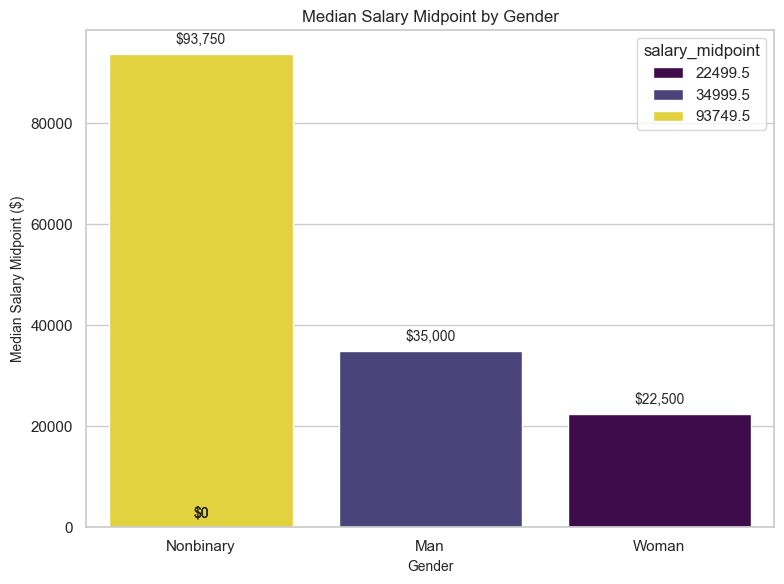

In [26]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x=median_salary.index, # Genders on the x-axis
    y=median_salary.values, # Median salaries on the y-axis
    hue=median_salary,
    palette='viridis'
)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f"${p.get_height():,.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.title('Median Salary Midpoint by Gender', fontsize=12)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Median Salary Midpoint ($)', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Convert statistics to dataframe and export

In [27]:
# Convert the Series to a DataFrame
median_salary_df = median_salary.reset_index()

# Rename the columns for clarity in the CSV
median_salary_df.columns = ['Gender', 'Median Salary Midpoint']

# Export to CSV
median_salary_df.to_csv('data/outputs/tables_graphs/median_salary_by_gender.csv', index=False)

#### Salary distribution by gender - Count

In [28]:
crosstab_paygap = pd.crosstab(df_filtered['q29'], df_filtered['q3']).reindex(columns=gender_order)
crosstab_paygap

q3,Woman,Man,Nonbinary
q29,,,
$0-999,296,797,2
"1,000-1,999",85,354,0
"2,000-2,999",52,216,1
"3,000-3,999",57,185,0
"4,000-4,999",48,183,0
"5,000-7,499",61,327,1
"7,500-9,999",62,298,1
"10,000-14,999",86,401,0
"15,000-19,999",56,241,0


#### Salary by gender (Percentage)

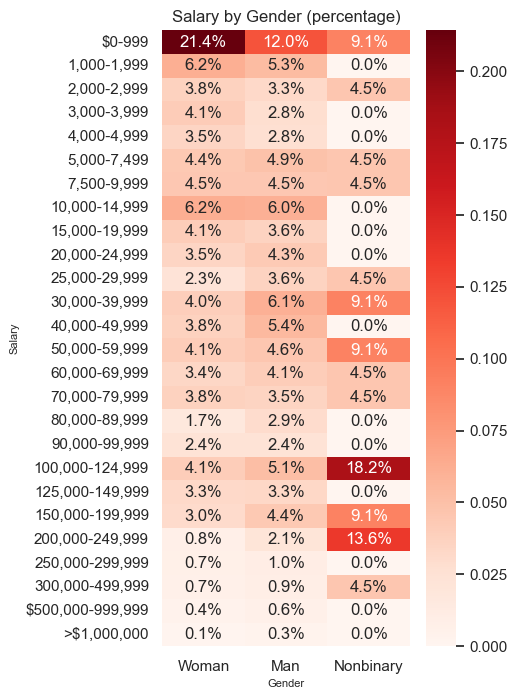

In [29]:
crosstab_paygap_prop = pd.crosstab(df_filtered['q29'], df_filtered['q3'], normalize='columns').reindex(columns=gender_order)

plt.figure(figsize=(4, 8))
sns.heatmap(crosstab_paygap_prop, annot=True, cmap="Reds", fmt=".1%")
plt.xlabel('Gender', fontsize=8)
plt.ylabel('Salary', fontsize=8)
plt.title('Salary by Gender (percentage)', fontsize=12)
plt.show()

#### **Analysis**
Visualizations show median and mean salary midpoints by gender, revealing that men tend to earn higher salaries than women and nonbinary respondents within this dataset. Boxplots highlight variability and overlap but indicate a consistent difference in central tendency.

The distribution of respondents across detailed salary ranges, as explored further, shows concentration of men in higher salary brackets.

Statistical tests via chi-square confirm a significant association between gender and salary ranges, affirming that observed pay gaps are unlikely due to chance.

These findings reflect ongoing gender-related salary disparities in the field, underscoring the importance of targeted actions for equity and inclusion.

#### 7. Job title by gender

In [30]:
crosstab_job = pd.crosstab(df_filtered['q23'], df_filtered['q3']).reindex(columns=gender_order)
crosstab_job

q3,Woman,Man,Nonbinary
q23,,,
Data Administrator,13,54,0
"Data Analyst (Business, Marketing, Financial, Quantitative, etc)",275,1065,3
Data Architect,8,72,0
Data Engineer,39,241,0
Data Scientist,261,1424,5
Developer Advocate,8,44,0
Engineer (non-software),45,364,1
Machine Learning/ MLops Engineer,49,444,1
"Manager (Program, Project, Operations, Executive-level, etc)",82,649,5


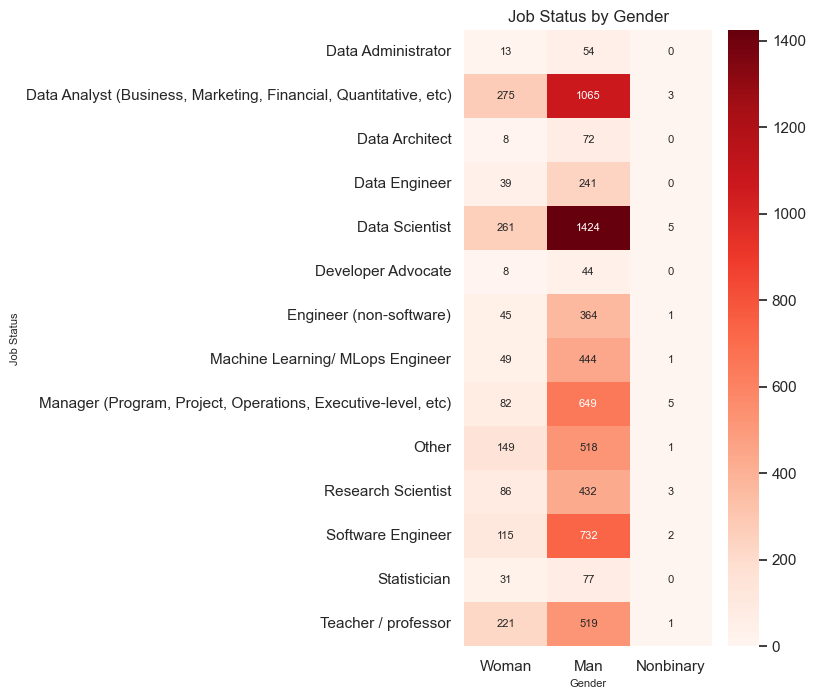

In [31]:
plt.figure(figsize=(4, 8))
sns.heatmap(crosstab_job, annot=True, cmap="Reds", fmt="d", annot_kws={"fontsize": 8})
plt.xlabel('Gender', fontsize=8)
plt.ylabel('Job Status', fontsize=8)
plt.title('Job Status by Gender', fontsize=12)
plt.show()

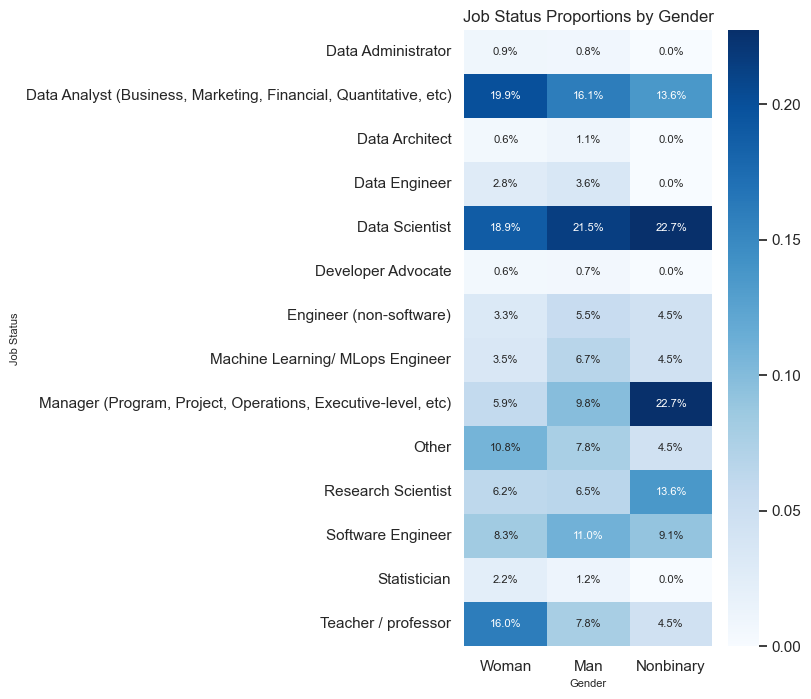

In [32]:
crosstab_job_prop = pd.crosstab(df_filtered['q23'], df_filtered['q3'], normalize='columns').reindex(columns=gender_order)

plt.figure(figsize=(4, 8))
sns.heatmap(crosstab_job_prop, annot=True, cmap="Blues", fmt=".1%", annot_kws={"fontsize": 8})
plt.xlabel('Gender', fontsize=8)
plt.ylabel('Job Status', fontsize=8)
plt.title('Job Status Proportions by Gender', fontsize=12)
plt.show()

**Analysis**
- Gender representation varies substantially across different job titles in the data science and machine learning domain.
- Some roles have pronounced gender imbalances, with certain positions dominated by men and others showing higher proportions of women or balanced representation.
- These patterns may reflect historical occupational segregation, access to opportunities, or cultural factors within the industry.
- Understanding these differences is vital for designing interventions to enhance diversity and promote inclusive career progression pathways.

## Statistical Analysis
### Chi-square test: gender x salary

In [33]:
_, chi2_pvalue, _, _  = chi2_contingency(crosstab_paygap)
print(float(chi2_pvalue))
print(float(chi2_pvalue) < 0.05)

2.042224664881291e-16
True


**Analysis** 
- The statistical analysis section presents formal hypothesis testing results supporting earlier descriptive findings.
- Chi-square tests of independence between gender and salary categories consistently indicate significant associations, supporting the existence of a pay gap.
- Crosstabulations provide detailed frequency distributions underpinning these tests, allowing a granular look at gender-salary relationships.
- Future work may incorporate regression modeling or other inferential techniques to unpack further covariates influencing pay disparities.

## Conclusion
- Significant gender disparities persist in salary among surveyed data science professionals, with men earning noticeably higher median salaries.
- Gender imbalances are observed not only in pay but also in age distributions and job titles, pointing to systemic issues across multiple axes.
- Statistical tests confirm these gaps are statistically significant, underscoring the need for interventions.
- Women and nonbinary individuals are better represented among students than professionals, highlighting potential pipeline challenges.
- Representation in senior job roles remains skewed, suggesting barriers to advancement.
- Comprehensive strategies addressing pay equity, recruitment, workplace culture, and career support are essential to foster diversity.
- Continued data-driven monitoring and transparent reporting are required for accountability and progress tracking.